In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING THE DATA

In [19]:
df = pd.read_csv("train.csv")

# Check for missing values

In [20]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# CLEANING THE DATA

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop('Cabin', axis=1, inplace=True)

# COMPUTING KEY STATISTICS


In [22]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# GENERATING VISUALIZATIONS


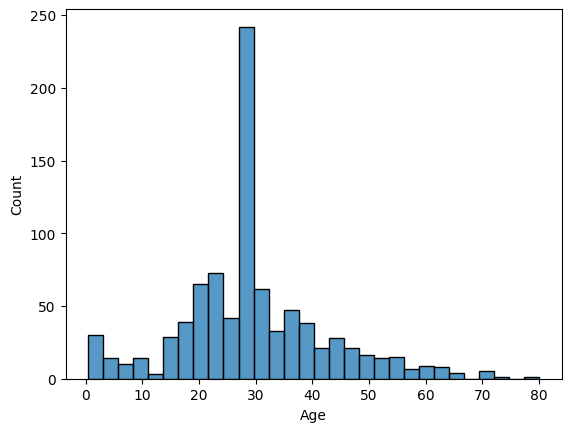

In [23]:
sns.histplot(df['Age'])
plt.show()

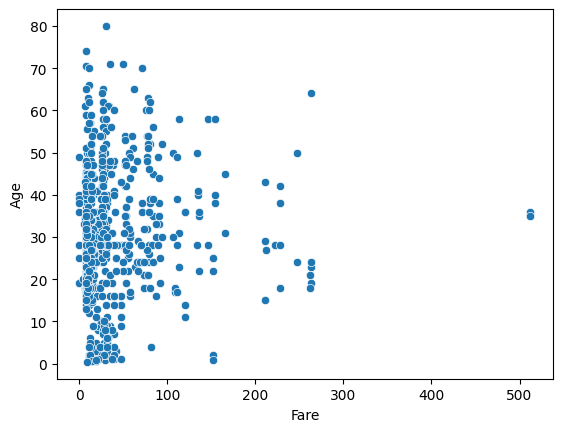

In [24]:
sns.scatterplot(x='Fare', y='Age', data=df)
plt.show()

# HANDLING OUTLIERS

In [25]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
print(df_no_outliers.describe())

       PassengerId    Survived     Pclass         Age       SibSp       Parch  \
count   775.000000  775.000000  775.00000  775.000000  775.000000  775.000000   
mean    445.806452    0.339355    2.48000   28.748710    0.437419    0.340645   
std     260.116285    0.473796    0.73439   12.782123    0.899838    0.785914   
min       1.000000    0.000000    1.00000    0.420000    0.000000    0.000000   
25%     213.500000    0.000000    2.00000   22.000000    0.000000    0.000000   
50%     450.000000    0.000000    3.00000   28.000000    0.000000    0.000000   
75%     670.500000    1.000000    3.00000   34.000000    1.000000    0.000000   
max     891.000000    1.000000    3.00000   80.000000    5.000000    6.000000   

             Fare  
count  775.000000  
mean    17.822091  
std     13.578085  
min      0.000000  
25%      7.895800  
50%     13.000000  
75%     26.000000  
max     65.000000  
